# 1.1. Static Page

In [2]:
from flask import Flask

### **`Endpoints`**

In [12]:
app = Flask(__name__)

@app.route('/')
def hello():
    return "<h1>Hello World!</h1>"

@app.route('/hello')
def hello_flask():
    return "<h1>Hello Flask!</h1>"

@app.route('/first')
def hello_first():
    return "<h1>Hello First!</h1>"

if __name__ == "__main__":
    app.run(host="0.0.0.0", port="8080")

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.100.32:8080 (Press CTRL+C to quit)


### **`Path Parameter`**

In [14]:
app = Flask(__name__)

@app.route('/')
def hello():
    return "<h1>Hello World!</h1>"

@app.route('/profile/<username>')
def get_profile(username):
    return "profile: " + username

@app.route('/first/<username>')
def get_first(username):
    return "<h1>Hello " + username + "!</h1>"

if __name__ == "__main__":
    app.run(host='0.0.0.0', port='8080')

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.100.32:8080 (Press CTRL+C to quit)


### **`Query Parameter`**

- **request** module 의 args.get() 을 활용하여 **query parameter** 의 값을 받아올 수 있다.
- **query parameter** 는 **URL** 뒤에 **?** 로 시작하며, 각각의 **parameter** 는 **&** 로 구분된다.
- **query parameter** 는 **key=value** 의 형태로 작성한다.
- 아래의 경우에는 **http://localhost:8080/login?user_name=aiden&password=1234&email=aiden@gmail.com** 과 같이 작성한다.

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/login')
def login():
    username = request.args.get('user_name')
    password = request.args.get('password')
    email = request.args.get('email')
    
    if username == 'aiden':
        return_data = {'auth': 'success'}
    else:
        return_data = {'auth': 'failed'}
    
    return jsonify(return_data)

if __name__ == '__main__':
    app.run(host="0.0.0.0", port="8080")

- 아래와 같이 html 을 작성하게 되면 **form** 을 통해 **/login** 에 요청을 보낼 수 있게 되며, **query parameter** 는 자동으로 입력된다.

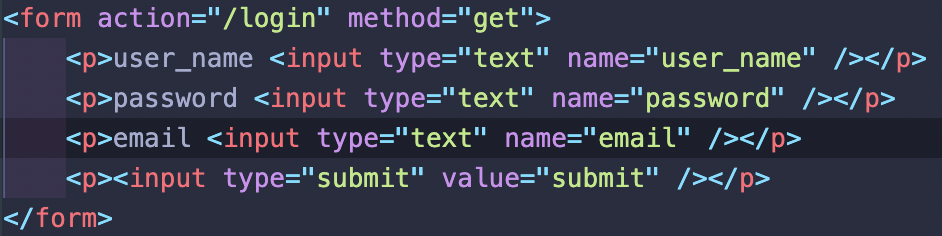

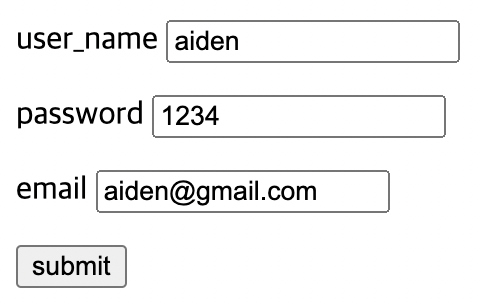

### **`render_template`**

- Flask 의 **render_template** 을 활용하면 **Static Page** 를 로드하여 화면에 랜더링할 수 있다.
- 이 때, 랜더링할 html 파일은 프로젝트 폴더 내의 **templates** 폴더에 위치하여야 한다.

In [ ]:
from flask import render_template

@app.route('/login_html')
def show_login_page():
    return render_template('login.html')

### **`type:hint`**

In [15]:
app = Flask(__name__)

def add_file(data):
    return data + 5

@app.route('/')
def hello():
    return "<h1>Hello World!</h1>"

@app.route('/message/<int:message_id>')
def get_message(message_id):
    return f"message id: {message_id}"

@app.route('/first/<int:message_id>')
def get_first(message_id):
    data = add_file(message_id)
    return f"<h1>{data}</h1>"

if __name__ == "__main__":
    app.run(host='0.0.0.0', port='8080')

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.100.32:8080 (Press CTRL+C to quit)
127.0.0.1 - - [26/Apr/2022 21:34:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2022 21:34:36] "GET /message/3 HTTP/1.1" 200 -
127.0.0.1 - - [26/Apr/2022 21:35:07] "GET /first/5 HTTP/1.1" 200 -


# 1.2. REST API

- **URI** 을 통해 자원을 식별
- **HTTP** 를 통해 데이터 통신
- **GET**, **POST**, **PUT**, **DELETE** 등 **Method** 를 통해 **CRUD** 를 구현 가능

### **`REST API in Flask`**

- 특정 **URI** 에 대한 요청 시, **JSON** 형식의 응답을 반환
- **dict type** 의 데이터 생성 후, **Jsonify** 를 활용해 타입 변환

In [18]:
from flask import Flask, jsonify
app = Flask(__name__)

In [19]:
@app.route('/json_test')
def hello_json():
    data = {
        'name': 'Aiden',
        'family': 'Lee'
    }
    return jsonify(data)

@app.route('/server_info')
def server_json():
    data = {
        'server_name': "0.0.0.0",
        'server_port': '8080'
    }
    return jsonify(data)

In [21]:
if __name__ == "__main__":
    app.run(host="0.0.0.0", port="8080")

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8080
 * Running on http://192.168.100.32:8080 (Press CTRL+C to quit)
